In [7]:
from google.colab import files
uploaded = files.upload()


Saving News.csv to News.csv


In [8]:
import pandas as pd

df = pd.read_csv('News.csv')
print("Original dataset shape:", df.shape)
df.head()

Original dataset shape: (12520, 2)


,text,label
0,sing praise mahinda lose voice sri lanka disro...,1
1,kojc rally first time davao city appoint son god,1
2,bill gate people resist mrna tsunami exclude s...,1
3,cure covid19 forward budesonide asthma drug pl...,1
4,president trump form patriot party 81 day elec...,1


In [9]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [10]:
import re
import pandas as pd
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk


stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    text = str(text).lower()
    text = re.sub(r'[^a-z\s]', '', text)
    tokens = word_tokenize(text)
    tokens = [t for t in tokens if t not in stop_words]
    tokens = [lemmatizer.lemmatize(t) for t in tokens]
    return ' '.join(tokens)
df['clean_text'] = df['text'].apply(preprocess_text)
df.head()



,text,label,clean_text
0,sing praise mahinda lose voice sri lanka disro...,1,sing praise mahinda lose voice sri lanka disro...
1,kojc rally first time davao city appoint son god,1,kojc rally first time davao city appoint son god
2,bill gate people resist mrna tsunami exclude s...,1,bill gate people resist mrna tsunami exclude s...
3,cure covid19 forward budesonide asthma drug pl...,1,cure covid forward budesonide asthma drug pls ...
4,president trump form patriot party 81 day elec...,1,president trump form patriot party day electio...


In [11]:
df['clean_text'] = df['clean_text'].apply(lambda x: x.split())
df['clean_text']

,clean_text
0,"[sing, praise, mahinda, lose, voice, sri, lank..."
1,"[kojc, rally, first, time, davao, city, appoin..."
2,"[bill, gate, people, resist, mrna, tsunami, ex..."
3,"[cure, covid, forward, budesonide, asthma, dru..."
4,"[president, trump, form, patriot, party, day, ..."
...,...
12515,"[kosher, economy, businesse, israel, include, ..."
12516,"[scene, authority, force, vaccination, people,..."
12517,"[world, briefing, africa, south, africa, setba..."
12518,"[text, image, read, daniel, andrew, net, worth..."


# Feature Extraction using Co-occurrence Matrices

Generate Co-occurrence Matrices from the text data and convert them into feature vectors.


In [12]:
# Feature Extraction using Co-occurrence Matrices
from sklearn.feature_extraction.text import CountVectorizer

# Create a CountVectorizer to generate co-occurrence matrices
vectorizer = CountVectorizer(ngram_range=(1, 2), max_features=5000)  # Unigrams and bigrams
# Join the tokens in 'clean_text' back into strings
df['clean_text'] = df['clean_text'].apply(lambda x: ' '.join(x))
X = vectorizer.fit_transform(df['clean_text'])

# Convert the sparse matrix to a dense format for ML models
X_dense = X.toarray()


In [8]:
df.head()

,text,label,clean_text
0,sing praise mahinda lose voice sri lanka disro...,1,sing praise mahinda lose voice sri lanka disro...
1,kojc rally first time davao city appoint son god,1,kojc rally first time davao city appoint son god
2,bill gate people resist mrna tsunami exclude s...,1,bill gate people resist mrna tsunami exclude s...
3,cure covid19 forward budesonide asthma drug pl...,1,cure covid forward budesonide asthma drug pls ...
4,president trump form patriot party 81 day elec...,1,president trump form patriot party day electio...


# ML Models


# Train Logistic Regression Model


Logistic Regression Accuracy: 92.97%
Training Accuracy: 93.26%
 Recall: 95.50%
 F1 Score: 94.01%
 Precision: 92.56%
 AUC Score: 97.98%
              precision    recall  f1-score   support

           0       0.94      0.90      0.92      1059
           1       0.93      0.96      0.94      1445

    accuracy                           0.93      2504
   macro avg       0.93      0.93      0.93      2504
weighted avg       0.93      0.93      0.93      2504



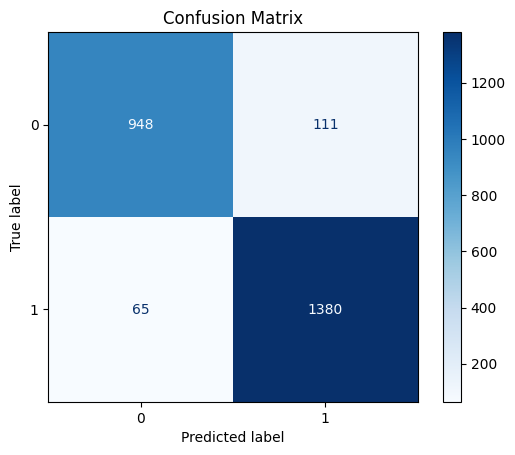

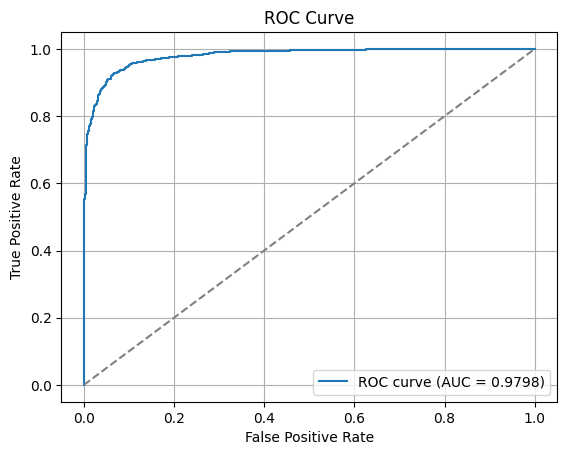

In [13]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve, precision_score
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Define hyperparameter grid
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # Regularization strength
    'penalty': ['l1', 'l2'],       # Regularization type
    'solver': ['liblinear']        # Solver compatible with l1 and l2 penalties
}

# Perform GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(LogisticRegression(max_iter=1000), param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Use the best model from GridSearchCV
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
y_prob = best_model.predict_proba(X_test)[:, 1]

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_prob)

print(f"Logistic Regression Accuracy: {accuracy * 100:.2f}%")
print(f'Training Accuracy: {grid_search.best_score_ * 100:.2f}%')
print(f" Recall: {recall * 100:.2f}%")
print(f" F1 Score: {f1 * 100:.2f}%")
print(f" Precision: {precision * 100:.2f}%")
print(f" AUC Score: {auc * 100:.2f}%")
print(classification_report(y_test, y_pred))

# Plot Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.figure()
plt.plot(fpr, tpr, label=f"ROC curve (AUC = {auc:.4f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


# Train Random Forest Model


Random Forest Test Accuracy: 89.06%
Random Forest Training Accuracy: 93.22%
 Recall: 94.74%
 F1 Score: 90.90%
 Precision: 87.36%
 AUC Score: 95.53%
              precision    recall  f1-score   support

           0       0.92      0.81      0.86      1059
           1       0.87      0.95      0.91      1445

    accuracy                           0.89      2504
   macro avg       0.90      0.88      0.89      2504
weighted avg       0.89      0.89      0.89      2504



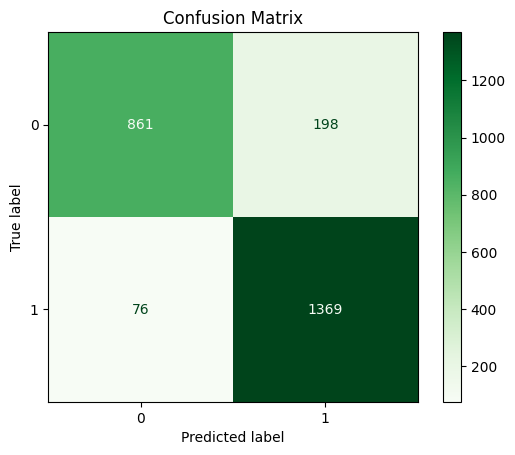

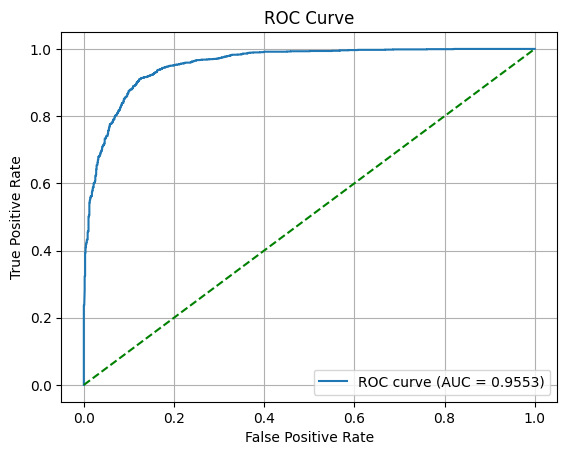

In [14]:
# Train Random Forest Model
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

# Adjust hyperparameters to improve performance
random_forest_model = RandomForestClassifier(
    n_estimators=200,  # Increase the number of trees
    max_depth=60,  # Increase max depth
    min_samples_split=3,  # Decrease minimum samples required to split
    min_samples_leaf=2,  # Decrease minimum samples per leaf
    max_features='sqrt',  # Use square root of features for better generalization
    random_state=42
)

# Train the model
random_forest_model.fit(X_train, y_train)
y_pred = random_forest_model.predict(X_test)
y_prob = random_forest_model.predict_proba(X_test)[:, 1]

# Test accuracy
test_accuracy = accuracy_score(y_test, y_pred) * 100
print(f"Random Forest Test Accuracy: {test_accuracy:.2f}%")

# Training accuracy
train_accuracy = accuracy_score(y_train, random_forest_model.predict(X_train)) * 100
print(f"Random Forest Training Accuracy: {train_accuracy:.2f}%")

# Calculate metrics
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_prob)

print(f" Recall: {recall * 100:.2f}%")
print(f" F1 Score: {f1 * 100:.2f}%")
print(f" Precision: {precision * 100:.2f}%")
print(f" AUC Score: {auc * 100:.2f}%")
print(classification_report(y_test, y_pred))

# Plot Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Greens)
plt.title("Confusion Matrix")
plt.show()
print('\n\n')
# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)
plt.figure()
plt.plot(fpr, tpr, label=f"ROC curve (AUC = {roc_auc:.4f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='green')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


# Train Decision Tree Model


Decision Tree Test Accuracy: 85.38%
Decision Tree Training Accuracy: 92.69%
              precision    recall  f1-score   support

           0       0.87      0.77      0.82      1059
           1       0.84      0.92      0.88      1445

    accuracy                           0.85      2504
   macro avg       0.86      0.84      0.85      2504
weighted avg       0.86      0.85      0.85      2504



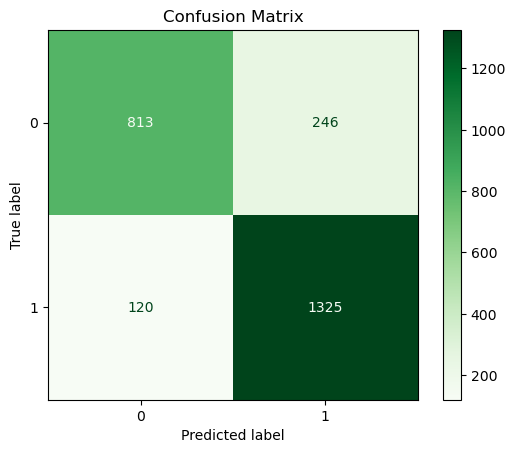

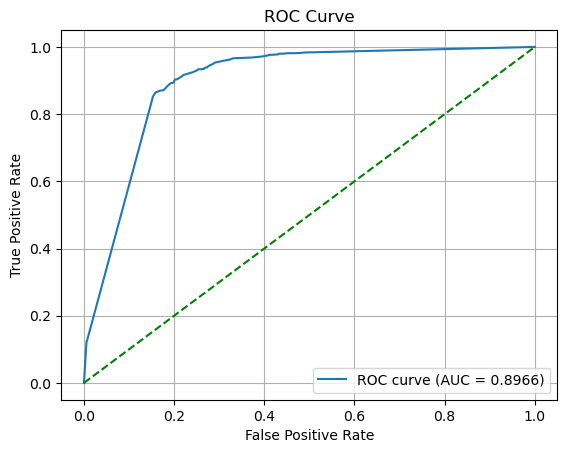

In [ ]:
# Train Decision Tree Model
from sklearn.tree import DecisionTreeClassifier

# Train Decision Tree
decision_tree_model = DecisionTreeClassifier(max_depth=42, random_state=42)  # You can adjust max_depth as needed
# decision_tree_model = DecisionTreeClassifier(max_depth=50, random_state=62)  # You can adjust max_depth as needed

decision_tree_model.fit(X_train, y_train)
y_pred = decision_tree_model.predict(X_test)

# Test accuracy
test_accuracy = accuracy_score(y_test, y_pred) * 100
print(f"Decision Tree Test Accuracy: {test_accuracy:.2f}%")

# Training accuracy
train_accuracy = accuracy_score(y_train, decision_tree_model.predict(X_train)) * 100
print(f"Decision Tree Training Accuracy: {train_accuracy:.2f}%")

print(classification_report(y_test, y_pred))

import matplotlib.pyplot as plt

# Plot Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Greens)
plt.title("Confusion Matrix")
plt.show()

# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)
plt.figure()
plt.plot(fpr, tpr, label=f"ROC curve (AUC = {roc_auc:.4f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='green')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

# Train Support Vector Machine (SVM) Model


SVM Test Accuracy: 92.37%
SVM Training Accuracy: 97.80%
 Recall: 95.22%
 F1 Score: 93.51%
 Precision: 91.86%
 AUC Score: 97.18%
              precision    recall  f1-score   support

           0       0.93      0.88      0.91      1059
           1       0.92      0.95      0.94      1445

    accuracy                           0.92      2504
   macro avg       0.92      0.92      0.92      2504
weighted avg       0.92      0.92      0.92      2504



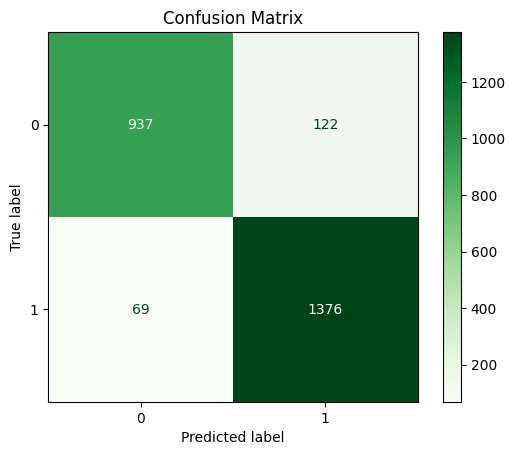

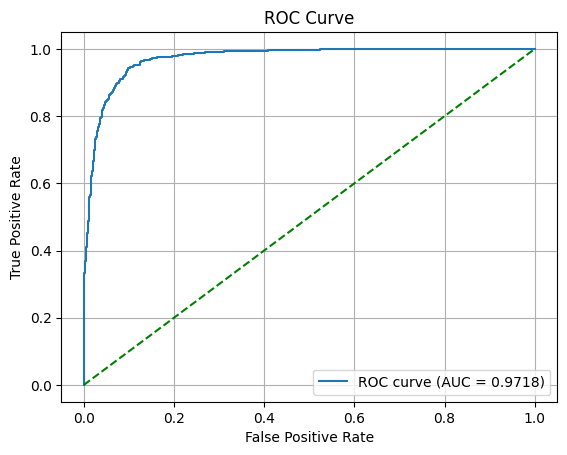

In [21]:
# Train SVM Model
from sklearn.svm import SVC

# Train SVM with regularization to prevent overfitting
# svm_model = SVC(kernel='linear', C=0.1)  # Adding regularization with a smaller C value C=0.1)  # Adding regularization with a smaller C value C=0.1)  # Adding regularization with a smaller C value
svm_model = SVC(kernel='linear', C=0.08)  # Adding regularization with a smaller C value C=0.1)  # Adding regularization with a smaller C value C=0.1)  # Adding regularization with a smaller C value

svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)

# Test accuracy
test_accuracy = accuracy_score(y_test, y_pred) * 100
print(f"SVM Test Accuracy: {test_accuracy:.2f}%")

# Training accuracy
train_accuracy = accuracy_score(y_train, svm_model.predict(X_train)) * 100
print(f"SVM Training Accuracy: {train_accuracy:.2f}%")

# Calculate metrics
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_prob)

print(f" Recall: {recall * 100:.2f}%")
print(f" F1 Score: {f1 * 100:.2f}%")
print(f" Precision: {precision * 100:.2f}%")
print(f" AUC Score: {auc * 100:.2f}%")
print(classification_report(y_test, y_pred))


import matplotlib.pyplot as plt

# Plot Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Greens)
plt.title("Confusion Matrix")
plt.show()
print('\n\n')

# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)
plt.figure()
plt.plot(fpr, tpr, label=f"ROC curve (AUC = {roc_auc:.4f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='green')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

# Train Naive Bayes Model


Naive Bayes Test Accuracy: 91.45%
Naive Bayes Training Accuracy: 94.00%
 Recall: 91.70%
 F1 Score: 92.53%
 Precision: 93.38%
 AUC Score: 97.18%
              precision    recall  f1-score   support

           0       0.89      0.91      0.90      1059
           1       0.93      0.92      0.93      1445

    accuracy                           0.91      2504
   macro avg       0.91      0.91      0.91      2504
weighted avg       0.91      0.91      0.91      2504



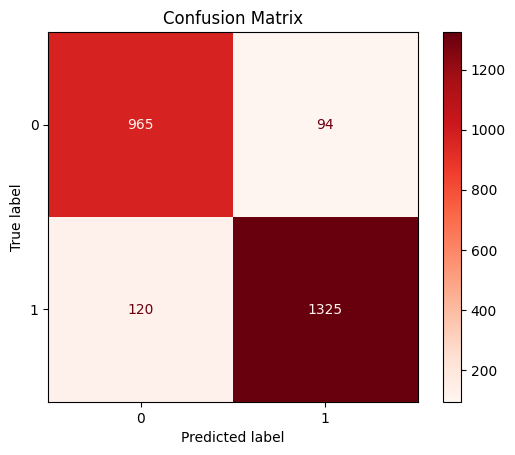

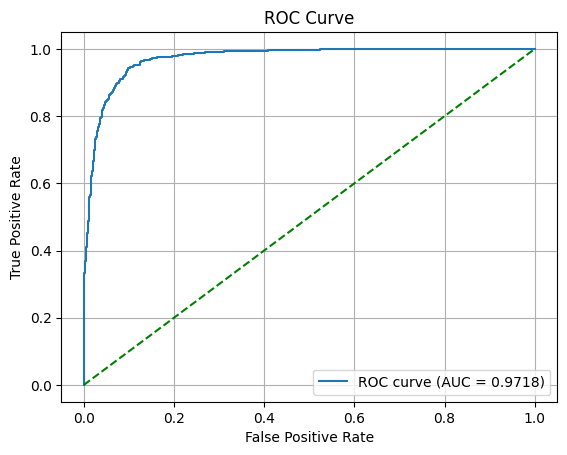

In [20]:
# Train Naive Bayes Model
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split # Import train_test_split
import pandas as pd # Import pandas for data manipulation
from sklearn.metrics import accuracy_score, classification_report, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve, precision_score # Import accuracy_score and other metrics
# Import ConfusionMatrixDisplay
from sklearn.metrics import ConfusionMatrixDisplay

# Assuming X and y are your feature and target data
# Assuming 'label' column contains your target variable
y = df['label'] # Define y using your target variable column
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # Split data

# Train Naive Bayes
naive_bayes_model = MultinomialNB()
naive_bayes_model.fit(X_train, y_train)
y_pred = naive_bayes_model.predict(X_test)

# Get predicted probabilities for Naive Bayes
y_prob = naive_bayes_model.predict_proba(X_test)[:, 1] # Assuming binary classification, get probabilities for class 1

# Test accuracy
test_accuracy = accuracy_score(y_test, y_pred) * 100
print(f"Naive Bayes Test Accuracy: {test_accuracy:.2f}%")

# Training accuracy
train_accuracy = accuracy_score(y_train, naive_bayes_model.predict(X_train)) * 100
print(f"Naive Bayes Training Accuracy: {train_accuracy:.2f}%")

# Calculate metrics
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Calculate AUC using the y_prob for Naive Bayes
auc = roc_auc_score(y_test, y_prob)

print(f" Recall: {recall * 100:.2f}%")
print(f" F1 Score: {f1 * 100:.2f}%")
print(f" Precision: {precision * 100:.2f}%")
print(f" AUC Score: {auc * 100:.2f}%")
print(classification_report(y_test, y_pred))


import matplotlib.pyplot as plt

# Plot Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Reds)
plt.title("Confusion Matrix")
plt.show()
print('\n\n')
# Plot ROC Curve, using y_prob for Naive Bayes
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)
plt.figure()
plt.plot(fpr, tpr, label=f"ROC curve (AUC = {roc_auc:.4f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='green')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

# DL Models


In [23]:
!pip install tensorflow


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 644.9/644.9 MB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 81.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 104.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 101.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 92.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 16.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.5/72.5 kB 5.4 MB/s eta 0:00:00


# Train Dense Neural Network Model


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
251/251 ━━━━━━━━━━━━━━━━━━━━ 6s 20ms/step - accuracy: 0.7610 - loss: 1.4974 - val_accuracy: 0.9137 - val_loss: 0.5194
Epoch 2/50
251/251 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - accuracy: 0.9293 - loss: 0.4811 - val_accuracy: 0.9102 - val_loss: 0.5128
Epoch 3/50
251/251 ━━━━━━━━━━━━━━━━━━━━ 5s 18ms/step - accuracy: 0.9373 - loss: 0.4424 - val_accuracy: 0.9142 - val_loss: 0.5055
Epoch 4/50
251/251 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - accuracy: 0.9427 - loss: 0.4302 - val_accuracy: 0.9142 - val_loss: 0.4885
Epoch 5/50
251/251 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.9456 - loss: 0.4219 - val_accuracy: 0.9142 - val_loss: 0.4962
Epoch 6/50
251/251 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.9418 - loss: 0.4252 - val_accuracy: 0.9087 - val_loss: 0.5096
Epoch 7/50
251/251 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.9469 - loss: 0.4137 - val_accuracy: 0.9047 - val_loss: 0.5097
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step



Neural Network Test Accuracy: 92.41%
313/313 ━━━━━━━━━━

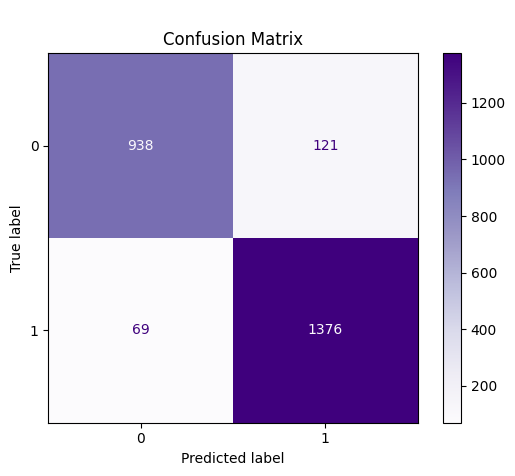

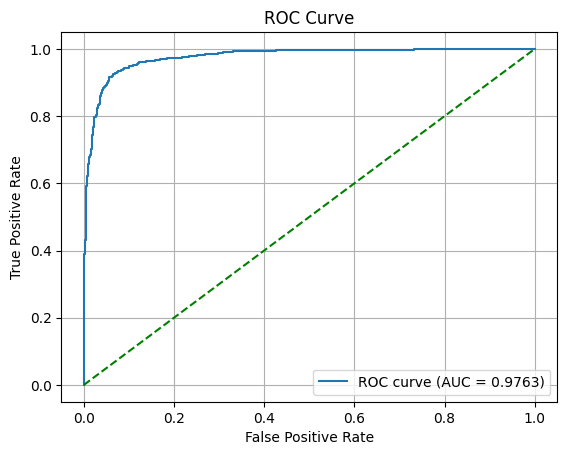

In [25]:
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2
from sklearn.metrics import (confusion_matrix, ConfusionMatrixDisplay,
                             roc_curve, roc_auc_score, accuracy_score,
                             classification_report)
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_dense, y, test_size=0.2, random_state=42)

y_categorical = to_categorical(y)

# Build model
dense_model = Sequential([
    Dense(128, activation='relu', input_shape=(X_dense.shape[1],), kernel_regularizer=l2(0.01)),
    Dropout(0.5),
    Dense(64, activation='relu', kernel_regularizer=l2(0.01)),
    Dropout(0.5),
    Dense(y_categorical.shape[1], activation='softmax')
])

# Compile model
dense_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train model
dense_model.fit(X_train, to_categorical(y_train), epochs=50, batch_size=32,
                validation_split=0.2, callbacks=[early_stopping])

# Predict on test set
y_prob = dense_model.predict(X_test)
y_pred = np.argmax(y_prob, axis=1)

print('\n\n')
# Accuracy and Classification Report
test_accuracy = accuracy_score(y_test, y_pred) * 100
print(f"Neural Network Test Accuracy: {test_accuracy:.2f}%")

train_pred = np.argmax(dense_model.predict(X_train), axis=1)
train_accuracy = accuracy_score(y_train, train_pred) * 100
print(f"Neural Network Training Accuracy: {train_accuracy:.2f}%")

# Calculate metrics
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

auc = roc_auc_score(y_test, y_prob[:, 1])

print(f" Recall: {recall * 100:.2f}%")
print(f" F1 Score: {f1 * 100:.2f}%")
print(f" Precision: {precision * 100:.2f}%")
print(f" AUC Score: {auc * 100:.2f}%")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Purples)
plt.title("\nConfusion Matrix")
plt.show()

print('\n')
# ROC Curve (only for binary classification)
if len(np.unique(y)) == 2:
    fpr, tpr, _ = roc_curve(y_test, y_prob[:, 1])
    roc_auc = roc_auc_score(y_test, y_prob[:, 1])
    plt.figure()
    plt.plot(fpr, tpr, label=f"ROC curve (AUC = {roc_auc:.4f})")
    plt.plot([0, 1], [0, 1], linestyle='--', color='green')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve")
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.show()
else:
    print("ROC curve is only shown for binary classification.")




# Train LSTM Model


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
126/126 ━━━━━━━━━━━━━━━━━━━━ 16s 112ms/step - accuracy: 0.5738 - loss: 2.2483 - val_accuracy: 0.7730 - val_loss: 1.9045
Epoch 2/50
126/126 ━━━━━━━━━━━━━━━━━━━━ 13s 102ms/step - accuracy: 0.7544 - loss: 1.7798 - val_accuracy: 0.8638 - val_loss: 1.7601
Epoch 3/50
126/126 ━━━━━━━━━━━━━━━━━━━━ 13s 101ms/step - accuracy: 0.8534 - loss: 1.5597 - val_accuracy: 0.8942 - val_loss: 1.5785
Epoch 4/50
126/126 ━━━━━━━━━━━━━━━━━━━━ 13s 100ms/step - accuracy: 0.8969 - loss: 1.4478 - val_accuracy: 0.9107 - val_loss: 1.4367
Epoch 5/50
126/126 ━━━━━━━━━━━━━━━━━━━━ 13s 103ms/step - accuracy: 0.9283 - loss: 1.3599 - val_accuracy: 0.9192 - val_loss: 1.3743
Epoch 6/50
126/126 ━━━━━━━━━━━━━━━━━━━━ 13s 103ms/step - accuracy: 0.9571 - loss: 1.2757 - val_accuracy: 0.9212 - val_loss: 1.3451
Epoch 7/50
126/126 ━━━━━━━━━━━━━━━━━━━━ 13s 101ms/step - accuracy: 0.9647 - loss: 1.2283 - val_accuracy: 0.9237 - val_loss: 1.3202
Epoch 8/50
126/126 ━━━━━━━━━━━━━━━━━━━━ 13s 100ms/step - accuracy: 0.9779 - loss: 1

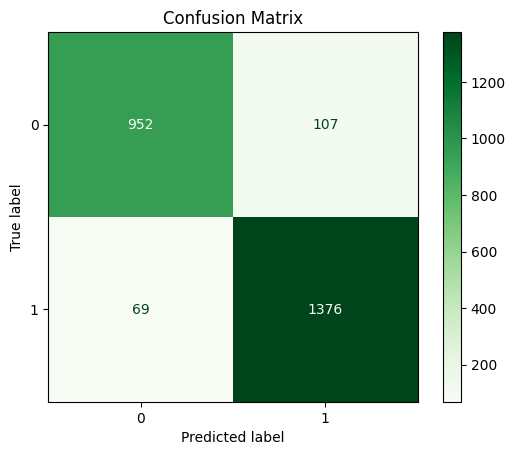

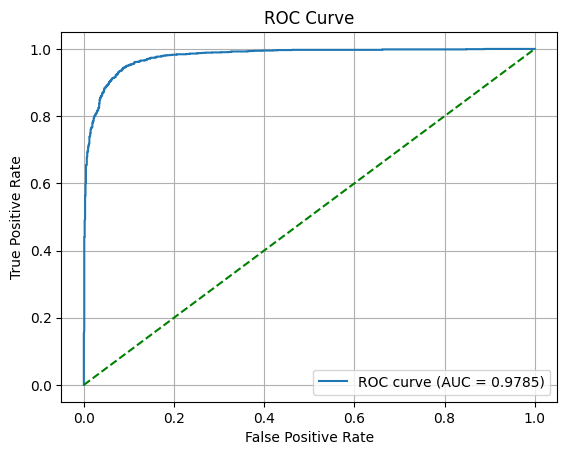

In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import (confusion_matrix, ConfusionMatrixDisplay,
                             roc_curve, roc_auc_score, accuracy_score,
                             classification_report)
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_dense, y, test_size=0.2, random_state=42)

# Convert labels to categorical
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

# Define model
dense_model = Sequential([
    Dense(512, activation='relu', input_shape=(X_dense.shape[1],), kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    Dropout(0.4),
    Dense(256, activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.4),
    Dense(128, activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.3),
    Dense(y_train_cat.shape[1], activation='softmax')
])

# Compile
dense_model.compile(optimizer=Adam(learning_rate=1e-4),
                    loss='categorical_crossentropy',
                    metrics=['accuracy'])

# Early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train
dense_model.fit(X_train, y_train_cat, epochs=50, batch_size=64,
                validation_split=0.2, callbacks=[early_stopping])


# Predict
y_prob = dense_model.predict(X_test)
y_pred = np.argmax(y_prob, axis=1)

print('\n\n')

# Accuracy and Report
test_accuracy = accuracy_score(y_test, y_pred) * 100
print(f"Neural Network Test Accuracy: {test_accuracy:.2f}%")

train_pred = np.argmax(dense_model.predict(X_train), axis=1)
train_accuracy = accuracy_score(y_train, train_pred) * 100
print(f"Neural Network Training Accuracy: {train_accuracy:.2f}%")

# Calculate metrics
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
# Assuming binary classification, extract probabilities for class 1
auc = roc_auc_score(y_test, y_prob[:, 1])

print(f" Recall: {recall * 100:.2f}%")
print(f" F1 Score: {f1 * 100:.2f}%")
print(f" Precision: {precision * 100:.2f}%")
print(f" AUC Score: {auc * 100:.2f}%")
print(classification_report(y_test, y_pred))

print('\n\n')


# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Greens)
plt.title("Confusion Matrix")
plt.show()
print('\n')

# ROC Curve (only for binary classification)
if y_train_cat.shape[1] == 2:
    fpr, tpr, _ = roc_curve(y_test, y_prob[:, 1])
    roc_auc = roc_auc_score(y_test, y_prob[:, 1])
    plt.figure()
    plt.plot(fpr, tpr, label=f"ROC curve (AUC = {roc_auc:.4f})")
    plt.plot([0, 1], [0, 1], linestyle='--', color='green')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve")
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.show()
else:
    print("ROC curve is only shown for binary classification.")

